In [8]:
# 导入需要的包
import numpy as np
import torch
from torch import nn
from PIL import Image
import matplotlib.pyplot as plt
import os
from torchvision import datasets, models, transforms, utils

### Step1. 准备数据

In [9]:
# 数据归一化
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize(mean=[0.1307], std=[0.3081])])

In [10]:
# 下载训练和测试数据
train_data = datasets.MNIST(root='./data',
                      transform=transform,
                      train=True,
                      download=True)
test_data = datasets.MNIST(root='./data',
                      transform=transform,
                      train=False)

/home/jack/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [11]:
# 输出一个样本，一个样本是由一张图片和对应的标签组成的
for i, data in enumerate(train_data):
    print(data)
    break
# 输出训练和测试图片数
print(len(train_data))
print(len(test_data))

(tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -

In [12]:
# 加载训练和测试数据
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True, num_workers=2)

In [13]:
# 查看一个batch的数据
data_iter = iter(train_loader)
images, labels = data_iter.next()
print(labels)

tensor([0, 1, 5, 6, 7, 3, 4, 2, 3, 0, 4, 8, 9, 8, 7, 3, 3, 7, 7, 8, 1, 0, 1, 4,
        1, 7, 0, 8, 5, 0, 3, 2, 6, 9, 5, 1, 1, 3, 9, 2, 9, 5, 7, 1, 5, 6, 7, 2,
        8, 4, 7, 1, 1, 1, 4, 0, 6, 0, 7, 0, 6, 4, 7, 5])


In [14]:
# 查看train_loader和test_loader的长度
print(len(train_loader))
print(len(test_loader))
# 查看train_loader和test_loader的维度
for i, data in enumerate(train_loader):
    print(data[0].shape)
    break

for i, data in enumerate(test_loader):
    print(data[0].shape)
    break

938
157
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])


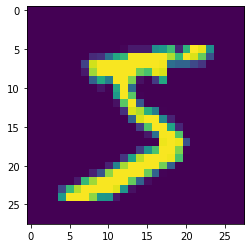

In [15]:
# 查看一张图片
oneimg, label = train_data[0]
oneimg = oneimg.numpy().transpose(1,2,0)
mean = [0.5]
std = [0.5]
oneimg = oneimg * std + mean
oneimg.resize(28,28)
plt.imshow(oneimg)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


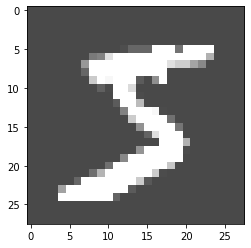

In [16]:
# 从三维生成一张黑白图片
oneimg, label = train_data[0]
grid = utils.make_grid(oneimg)
grid = grid.numpy().transpose(1,2,0)
mean = [0.5]
std = [0.5]
grid = grid * std + mean
plt.imshow(grid)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(9) tensor(3) tensor(9) tensor(2) tensor(0) tensor(2) tensor(3) tensor(3) 
tensor(8) tensor(7) tensor(8) tensor(2) tensor(0) tensor(4) tensor(9) tensor(9) 
tensor(9) tensor(1) tensor(2) tensor(8) tensor(3) tensor(4) tensor(4) tensor(8) 
tensor(3) tensor(7) tensor(5) tensor(9) tensor(7) tensor(6) tensor(1) tensor(8) 
tensor(4) tensor(6) tensor(1) tensor(2) tensor(5) tensor(7) tensor(6) tensor(6) 
tensor(2) tensor(4) tensor(5) tensor(6) tensor(2) tensor(8) tensor(0) tensor(7) 
tensor(9) tensor(8) tensor(6) tensor(3) tensor(6) tensor(5) tensor(4) tensor(4) 
tensor(2) tensor(9) tensor(2) tensor(1) tensor(6) tensor(9) tensor(7) tensor(7) 


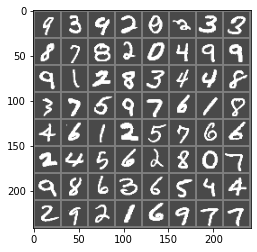

In [17]:
# 输出一个batch的图片和标签
images, labels = next(iter(train_loader))
img = utils.make_grid(images)
img = img.numpy().transpose(1,2,0)
std = [0.5]
mean = [0.5]
img = img * std + mean
for i in range(64):
    print(labels[i], end=' ')
    i += 1
    if i % 8 == 0:
        print(end='\n')
plt.imshow(img)
plt.show()

### Step 2. 网络搭建

1. 自定义一个网络
（两个卷积层, 三个全连接层）

In [18]:
import torch.nn.functional as F

class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(64*7*7, 1024) # 两个池化，所以是7*7
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10) # 十分类，所以输出是10通道
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64*7*7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
#         x = F.log_softmax(x,dim=1)# NLLLoss需要，crossentropyloss不需要
        return x
    
net = MyCNN()

2. 使用微调的resnet50

In [19]:
resnet50 = models.resnet50(pretrained=True)
resnet50.fc = nn.Linear(2048, 2)
# net = resnet50

2.定义损失函数和优化器

In [20]:
import torch.optim as optim
# loss
crition = nn.CrossEntropyLoss() # crossentropyloss里面封装了softmax,如果使用NLLLoss的话需要在定义的网络输出后面使用softmax将其转化为概率分布，然后君爱国年概率与labels做NLLLoss
# optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Step 3. 训练模型
1. 加载训练数据与标签，将其放置在GPU上
2. 前向+后向+优化
3. 保存模型

In [21]:
train_accs = []
train_loss = []
test_accs = []
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net = net.to(device)
for epoch in range(5): # 一共训练5个epoch
    running_loss = 0
    for i, data in enumerate(train_loader, 0):
        # data的格式[inputs, labels]
        # inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)
        # 初始为0， 清除上个batch的梯度信息
        optimizer.zero_grad()
        # 前向+后向+优化
        outputs = net(inputs)
        loss = crition(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 打印100个batch输出的平均loss
        running_loss += loss
        if i%100 == 99:
            print('[%d, %d] loss: % .3f' % (epoch+1, i+1, running_loss/100))
            running_loss = 0
        # 在training_loss中每个batch添加当前的loss
        train_loss.append(loss.item())
        
        #一个batch中的准确率
        correct = 0
        total = 0
        _, predicted = torch.max(outputs.data, 1) # outputs.data是
        total = labels.size(0) # labels的长度
        correct = (predicted==labels).sum().item() # 一个batch中预测正确的数量
        train_accs.append(100*correct/total)

print('Finished Training!')

[1, 100] loss:  2.252
[1, 200] loss:  1.814
[1, 300] loss:  0.775
[1, 400] loss:  0.450
[1, 500] loss:  0.383
[1, 600] loss:  0.349
[1, 700] loss:  0.312
[1, 800] loss:  0.287
[1, 900] loss:  0.262
[2, 100] loss:  0.233
[2, 200] loss:  0.216
[2, 300] loss:  0.195
[2, 400] loss:  0.179
[2, 500] loss:  0.183
[2, 600] loss:  0.176
[2, 700] loss:  0.154
[2, 800] loss:  0.149
[2, 900] loss:  0.145
[3, 100] loss:  0.133
[3, 200] loss:  0.126
[3, 300] loss:  0.128
[3, 400] loss:  0.108
[3, 500] loss:  0.110
[3, 600] loss:  0.116
[3, 700] loss:  0.105
[3, 800] loss:  0.096
[3, 900] loss:  0.097
[4, 100] loss:  0.093
[4, 200] loss:  0.085
[4, 300] loss:  0.094
[4, 400] loss:  0.094
[4, 500] loss:  0.081
[4, 600] loss:  0.079
[4, 700] loss:  0.091
[4, 800] loss:  0.088
[4, 900] loss:  0.093
[5, 100] loss:  0.076
[5, 200] loss:  0.063
[5, 300] loss:  0.074
[5, 400] loss:  0.072
[5, 500] loss:  0.080
[5, 600] loss:  0.072
[5, 700] loss:  0.064
[5, 800] loss:  0.067
[5, 900] loss:  0.061
Finished T

In [22]:
path = './mnist_net.pth'
torch.save(net.state_dict(), path)

### Step 4. 评估模型

画图

In [23]:
def draw_train_process(title, iters, costs, accs, label_cost, label_acc):
    plt.title(title, fontsize=24)
    plt.xlabel('iter', fontsize=20)
    plt.ylabel('acc(\%)', fontsize=20)
    plt.plot(iters, costs, color='red', label=label_cost)
    plt.plot(iters, accs, color='green', label=label_acc)
    plt.legend()
    plt.grid()
    plt.show()

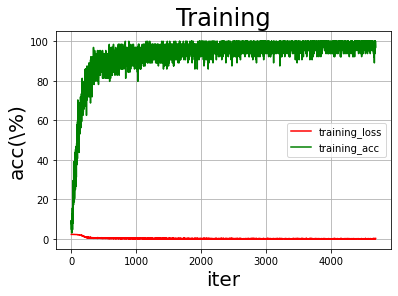

In [24]:
train_iters = range(len(train_accs))
draw_train_process('Training', train_iters, train_loss, train_accs, 'training_loss', 'training_acc')

测试一个batch的分类情况

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


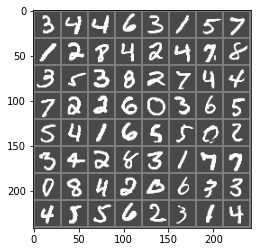

Ground Truth:  3 4 4 6 3 1 5 7 1 2 8 4 2 4 7 8 3 5 3 8 2 7 4 4 7 2 2 6 0 3 6 5 5 4 1 6 5 5 0 2 3 4 2 8 3 1 7 7 0 8 4 2 0 6 3 3 4 5 5 6 2 3 1 4


In [25]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
test_img = utils.make_grid(images)
test_img = test_img.numpy().transpose(1,2,0)
std = [0.5]
mean = [0.5]
test_img = test_img * std + mean
plt.imshow(test_img)
plt.show()
print('Ground Truth: ', ' '.join('%d' % labels[j] for j in range(64)))

In [26]:
test_net = MyCNN()
test_net.load_state_dict(torch.load(path))
outputs = test_net(images)
# print(outputs)
# print(outputs.size())

输出的是每一类对应的概率，所以需要选择max来确定最终输出的类别
dim=1表示选择行的最大索引

In [27]:
_, predicted = torch.max(outputs, dim=1)
print('Predicted: ', ' '.join('%d' % predicted[j] for j in range(64)))

Predicted:  3 4 4 6 3 1 5 7 1 2 8 4 2 4 7 8 3 5 3 8 2 7 4 4 7 2 2 6 0 3 6 5 5 4 1 6 5 5 0 2 3 2 2 8 3 1 7 7 0 8 4 2 0 6 3 3 4 5 5 6 2 3 1 4


测试集上面整体的准确率

In [28]:
correct = 0
total = 0
with torch.no_grad(): # 进行评测时网络不更新梯度
    for images, labels in test_loader:
        outputs = test_net(images)
        _, predicts = torch.max(outputs, dim=1)
        total += labels.size(0)
        correct += (predicts == labels).sum().item()
print('Accuracy of the network on the test images: %d %%' % (100*correct/total))

Accuracy of the network on the test images: 98 %


10个类别的准确率

In [123]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad(): # 进行评测时网络不更新梯度
    for data in test_loader:
        images, labels = data
#         print(labels)
        outputs = test_net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted==labels)
#         print(c)
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of %d : %32d %%' % (i, 100*class_correct[i] /class_total[i]))
            

Accuracy of 0 :                              100 %
Accuracy of 1 :                              100 %
Accuracy of 2 :                               97 %
Accuracy of 3 :                               98 %
Accuracy of 4 :                              100 %
Accuracy of 5 :                               98 %
Accuracy of 6 :                               99 %
Accuracy of 7 :                               99 %
Accuracy of 8 :                               97 %
Accuracy of 9 :                               98 %
